In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv("C:\\Users\\ankit\\Downloads\\Customers.csv")
transactions = pd.read_csv("C:\\Users\\ankit\\Downloads\\Transactions.csv")


In [27]:
# Merge datasets on CustomerID
data = pd.merge(customers, transactions, on='CustomerID')

# Feature engineering: Example - Calculate total transaction value for each customer
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

# Normalize features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'Price']])


In [39]:
# Fit the K-Means model with the optimal number of clusters (3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(customer_features_scaled)

# Add cluster labels to the original data
customer_features['Cluster'] = clusters


C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


DB Index

Davies-Bouldin Index: 0.9522776567654899


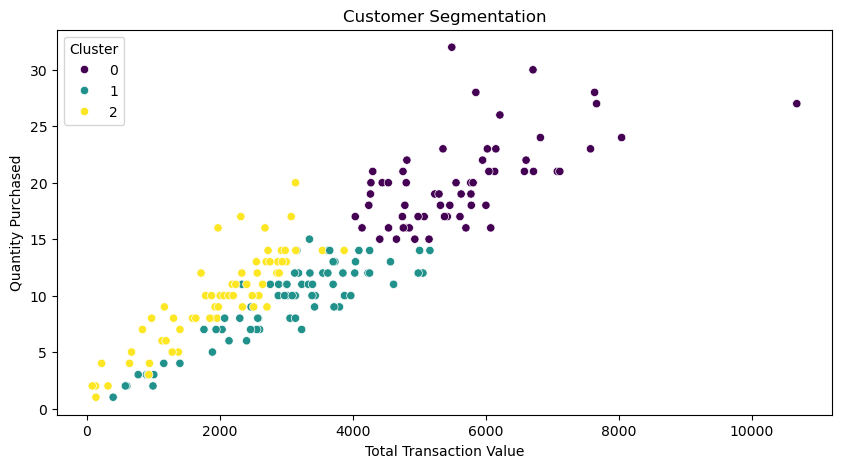

In [35]:
# Visualize the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=customer_features['TotalValue'], y=customer_features['Quantity'], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Transaction Value')
plt.ylabel('Quantity Purchased')
plt.show()
